In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import math
import spacy
import warnings
warnings.filterwarnings('ignore')

In [93]:
# Reading data from the source
df = pd.read_csv(r'C:\Playground\Toxicity_Classification\data\training\train.csv')

In [94]:
# Preview
df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [95]:
# Dropping irrelevant features
df.drop('id', axis=1, inplace=True)

In [96]:
# shape of the data
df.shape

(159571, 7)

In [97]:
# Checking datatype of the features
df.dtypes

comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [98]:
# Summary of the dataset
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   toxic          159571 non-null  int64 
 2   severe_toxic   159571 non-null  int64 
 3   obscene        159571 non-null  int64 
 4   threat         159571 non-null  int64 
 5   insult         159571 non-null  int64 
 6   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [100]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(0)

Insight: There are no duplicate rows in the data

In [101]:
# Checking for null values in the data
df.isna().sum().sum()

np.int64(0)

Insight: There are no null values in the dataset

# Univariate Analysis

In [102]:
df.head(5)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [103]:
# Storing all target columns into one
target_cols = [col for col in df.columns if df[col].dtype == 'int64']
for col in target_cols:
    print(df[col].value_counts(normalize=True) * 100)
    print('================')


toxic
0    90.415552
1     9.584448
Name: proportion, dtype: float64
severe_toxic
0    99.000445
1     0.999555
Name: proportion, dtype: float64
obscene
0    94.705178
1     5.294822
Name: proportion, dtype: float64
threat
0    99.700447
1     0.299553
Name: proportion, dtype: float64
insult
0    95.063639
1     4.936361
Name: proportion, dtype: float64
identity_hate
0    99.119514
1     0.880486
Name: proportion, dtype: float64


Target columns: 100%|█████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.28it/s]


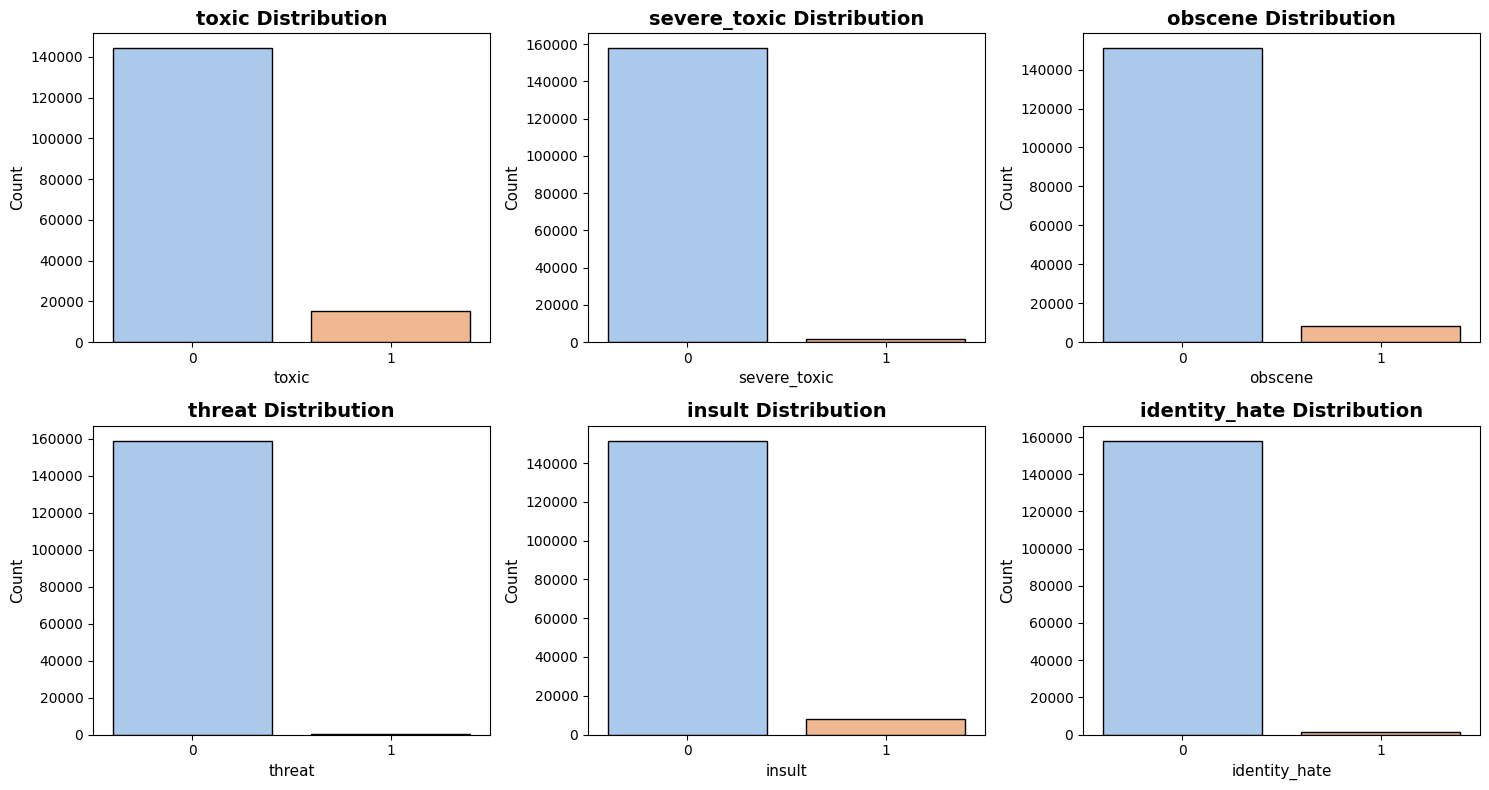

In [104]:
# Number of plots
n = len(target_cols)

# Creating rows & cols for grid
cols = 3
rows = math.ceil(n / cols)

# Creating figure
plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(tqdm(target_cols, desc="Target columns", colour="green", ncols=100)):

    plt.subplot(rows, cols, i + 1)
    sns.countplot(
        data=df,
        x=col,
        palette="pastel",
        edgecolor="black"
    )

    plt.title(f"{col} Distribution", fontsize=14, weight="bold")
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Count", fontsize=11)

# Showing the plot
plt.tight_layout()
plt.show()

In [105]:
# Compute sums
col_sums = df[target_cols].sum().sort_values(ascending=False)
col_sums

toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64

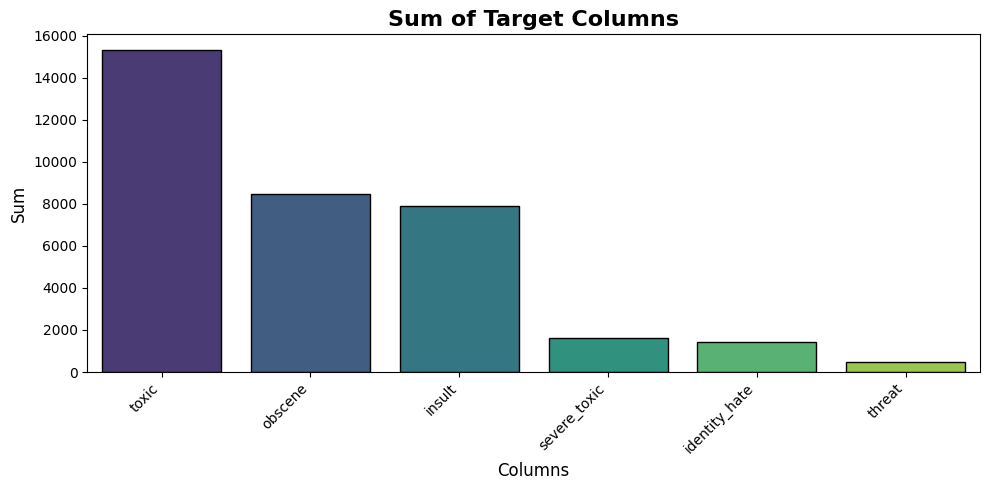

In [106]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=col_sums.index,
    y=col_sums.values,
    palette="viridis",
    edgecolor="black"
)

plt.title("Sum of Target Columns", fontsize=16, weight="bold")
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Sum", fontsize=12)

# Rotate labels for readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Labels:   0%|                                                                 | 0/6 [00:00<?, ?it/s]

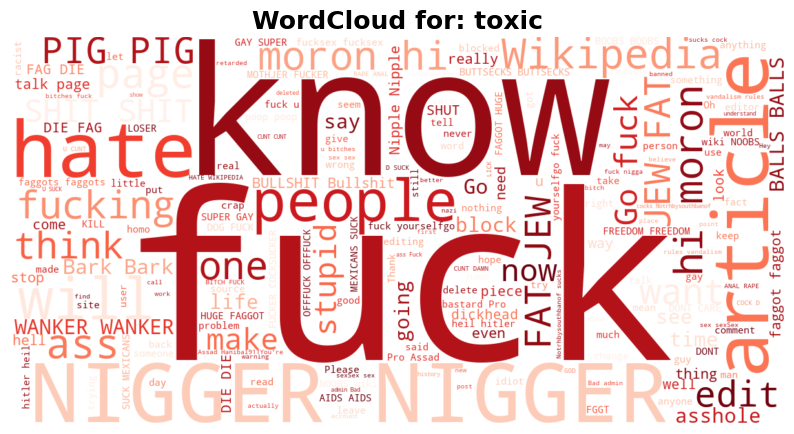

Labels:  17%|█████████▌                                               | 1/6 [00:03<00:16,  3.28s/it]

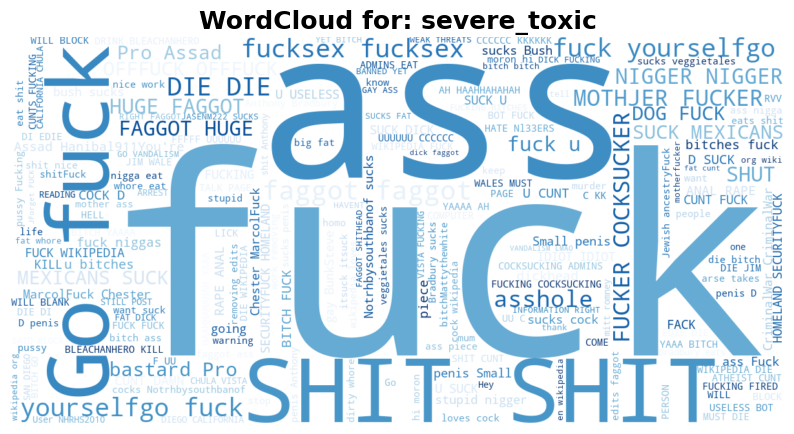

Labels:  33%|███████████████████                                      | 2/6 [00:04<00:09,  2.33s/it]

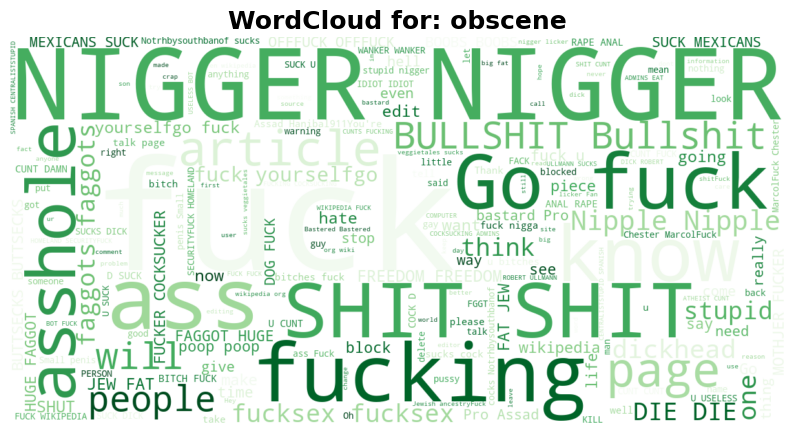

Labels:  50%|████████████████████████████▌                            | 3/6 [00:06<00:06,  2.20s/it]

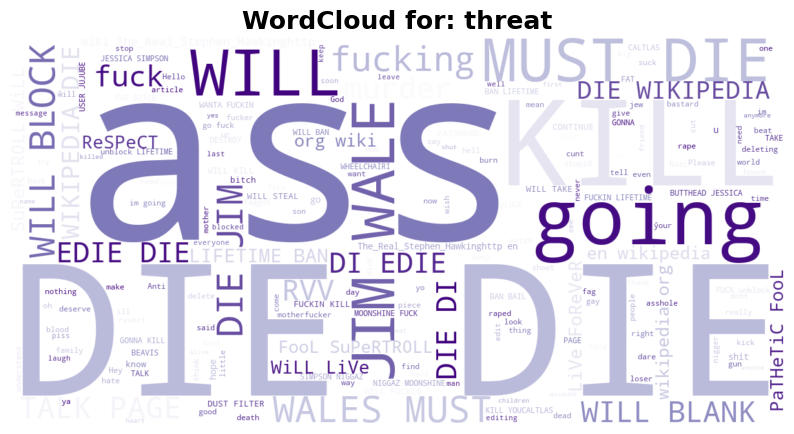

Labels:  67%|██████████████████████████████████████                   | 4/6 [00:08<00:03,  1.85s/it]

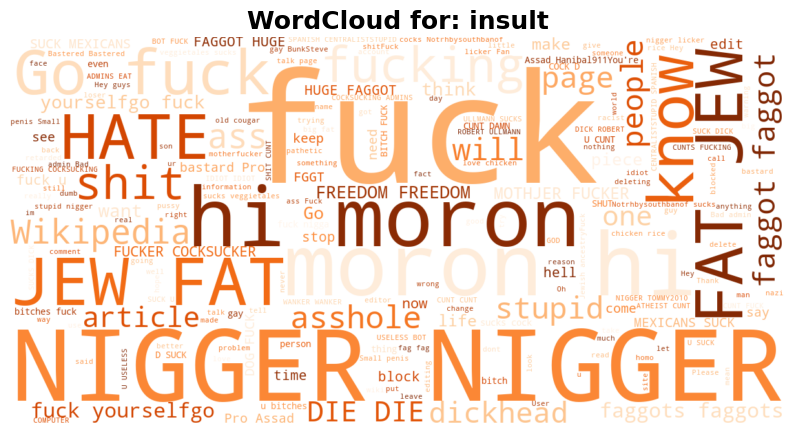

Labels:  83%|███████████████████████████████████████████████▌         | 5/6 [00:10<00:01,  1.99s/it]

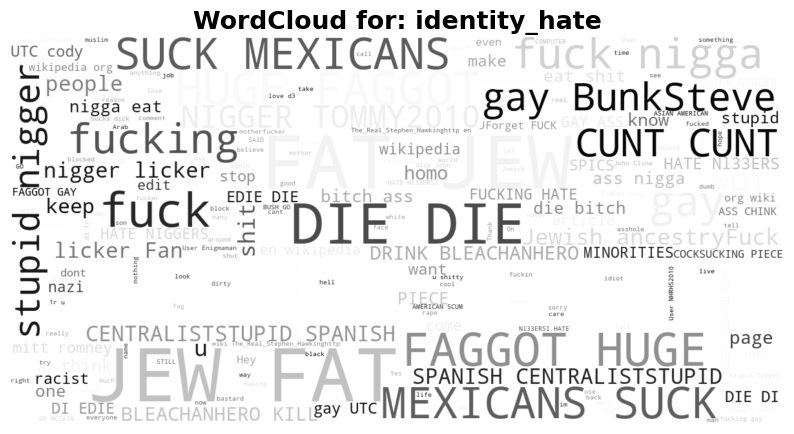

Labels: 100%|█████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.99s/it]


In [107]:
from wordcloud import WordCloud

colors = ["Reds", "Blues", "Greens", "Purples", "Oranges", "Greys"]

for (col, color) in tqdm(
        zip(target_cols, colors),
        total=len(target_cols),
        desc="Labels",
        colour="green",
        ncols=100):

    text = " ".join(df.loc[df[col] == 1, "comment_text"].astype(str))

    if len(text.strip()) == 0:
        print(f"Skipping '{col}' because it has no positive samples.")
        continue

    wc = WordCloud(
        background_color="white",
        colormap=color,
        width=1200,
        height=600,
        max_words=200
    ).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"WordCloud for: {col}", fontsize=18, weight="bold")
    plt.axis("off")
    plt.show()


### Feature Construction to get more insights

In [108]:
# Feature Construction from existing feature
df["number_of_characters"] = df['comment_text'].str.len()
df["number_of_words"] = df['comment_text'].apply(lambda x: len(x.split()))

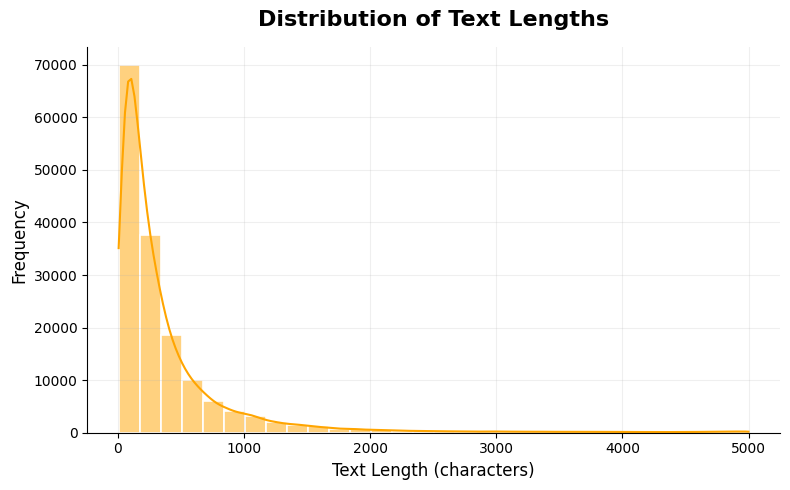

In [109]:
# Text Length Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=df['number_of_characters'], kde=True, color='orange', bins=30, edgecolor='white', linewidth=1.2)
plt.title("Distribution of Text Lengths", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Text Length (characters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

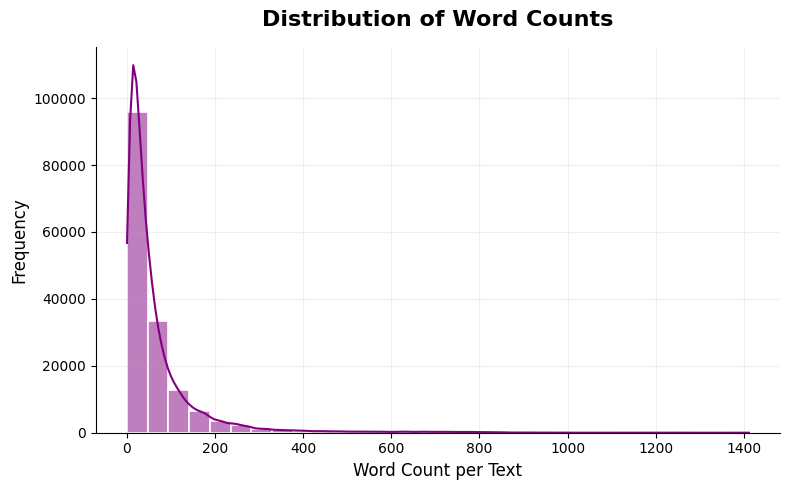

In [110]:
# Word Count Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=df['number_of_words'], kde=True, color="purple", bins=30, edgecolor='white', linewidth=1.2)
plt.title("Distribution of Word Counts", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Word Count per Text", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

In [111]:
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,number_of_characters,number_of_words
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,43
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,17
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,42
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,113
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,13
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295,47
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99,18
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81,12
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116,25


  0%|                                                                         | 0/2 [00:00<?, ?it/s]

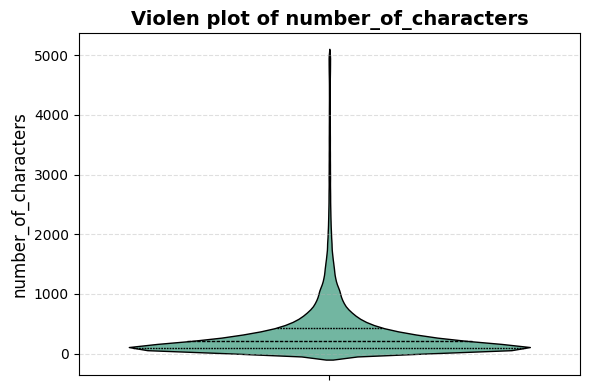

 50%|████████████████████████████████▌                                | 1/2 [00:00<00:00,  1.57it/s]

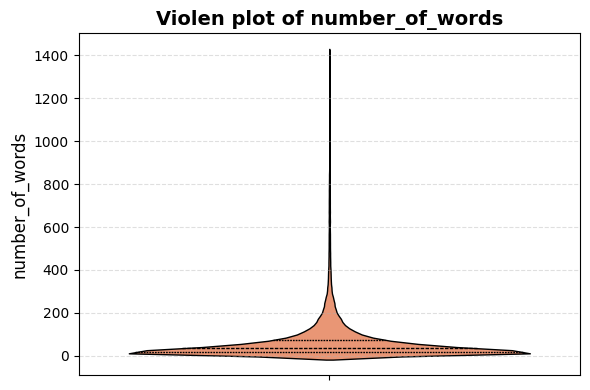

100%|█████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.59it/s]


In [112]:
new_cols = ['number_of_characters', 'number_of_words']
palette = sns.color_palette("Set2", len(new_cols))  # soft colors

for col, color in tqdm(zip(new_cols, palette),
                       total=len(new_cols),
                       colour="green",
                       ncols=100):

    plt.figure(figsize=(6, 4))

    sns.violinplot(
        data=df,
        y=col,
        color=color,
        linewidth=1,
        edgecolor="black",
        alpha=1,
        inner="quartile"
    )

    plt.title(f"Violen plot of {col}", fontsize=14, weight="bold")
    plt.ylabel(col, fontsize=12)

    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


# BI-Variate Analysis

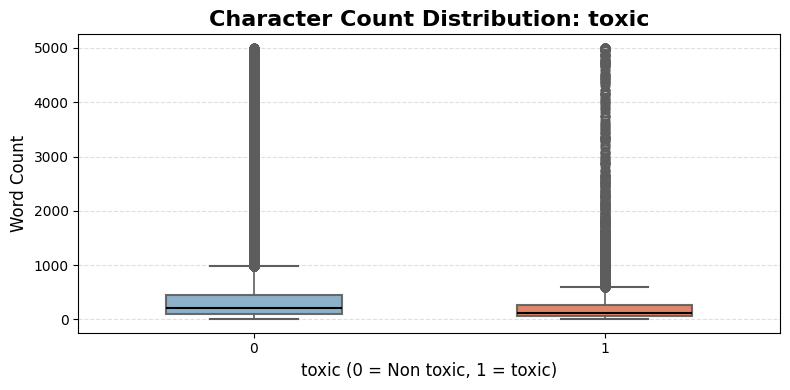

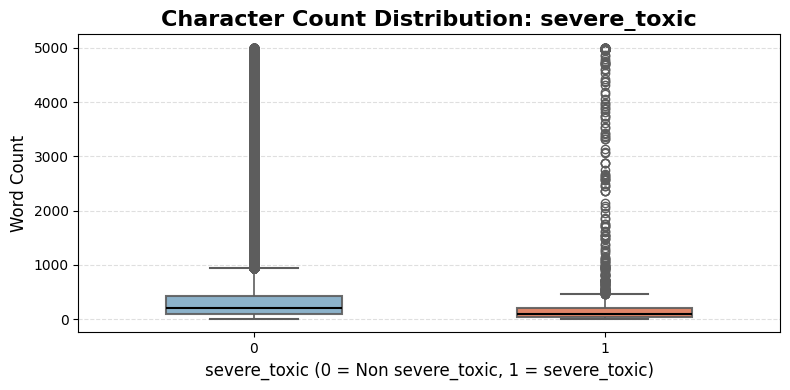

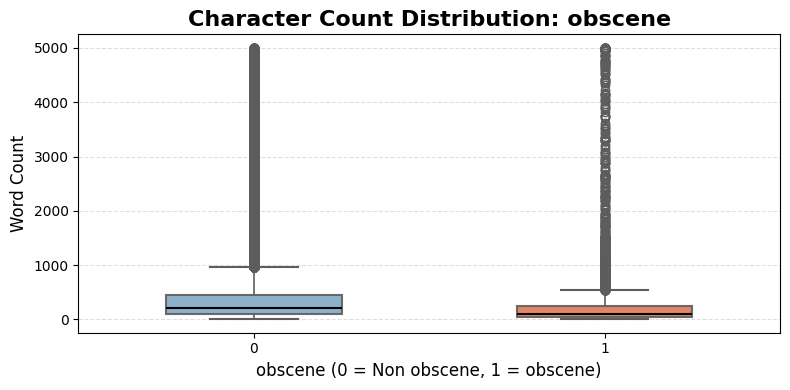

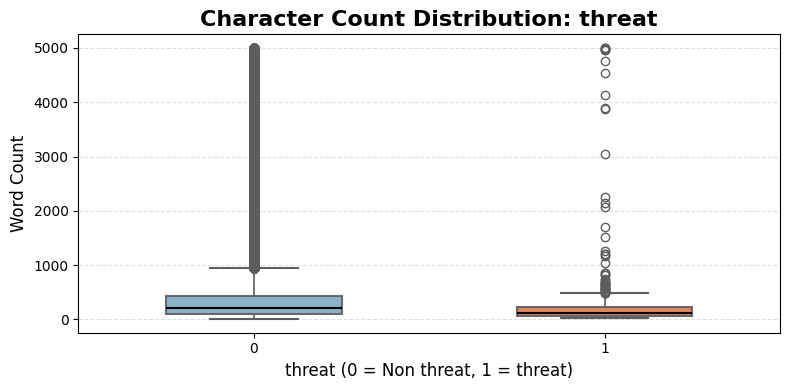

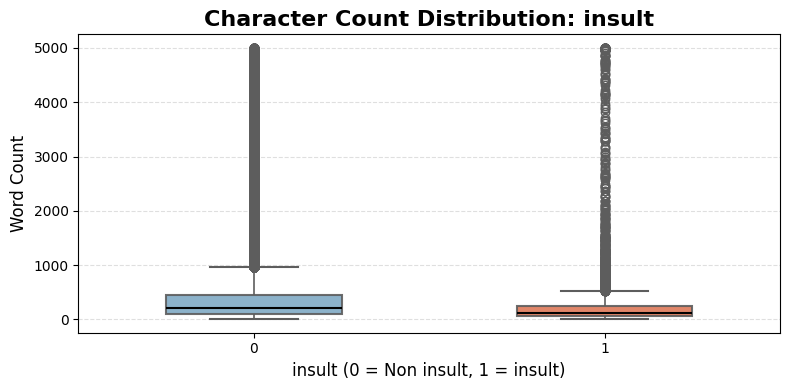

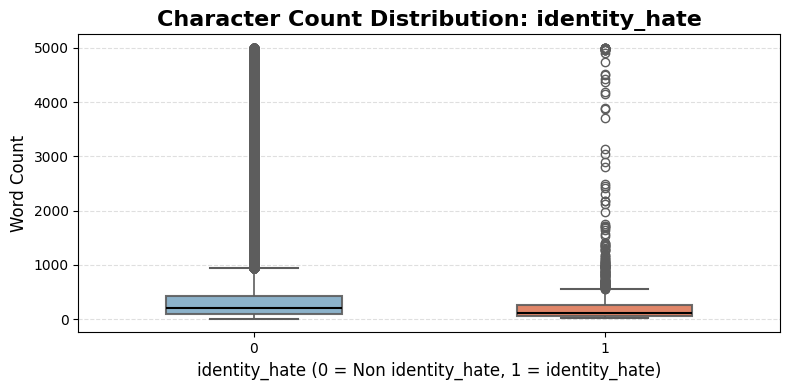

In [113]:
for label in target_cols:

    plt.figure(figsize=(8, 4))

    # More beautiful boxplot
    sns.boxplot(
        x=df[label],
        y=df["number_of_characters"],
        palette=["#74add1", "#f46d43"],   # custom colors
        width=0.5,
        linewidth=1.5,
        boxprops=dict(alpha=0.9),        # transparency
        whiskerprops=dict(linewidth=1.2),
        medianprops=dict(color="black", linewidth=1.5)
    )

    plt.title(f"Character Count Distribution: {label}", fontsize=16, weight="bold")
    plt.xlabel(f"{label} (0 = Non {label}, 1 = {label})", fontsize=12)
    plt.ylabel("Word Count", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    plt.tight_layout()
    plt.show()


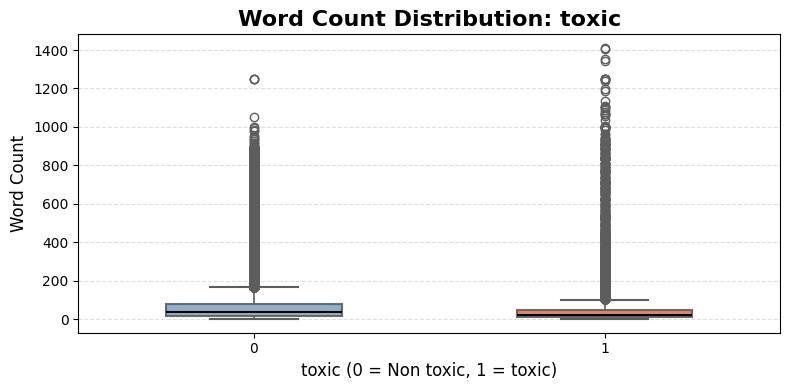

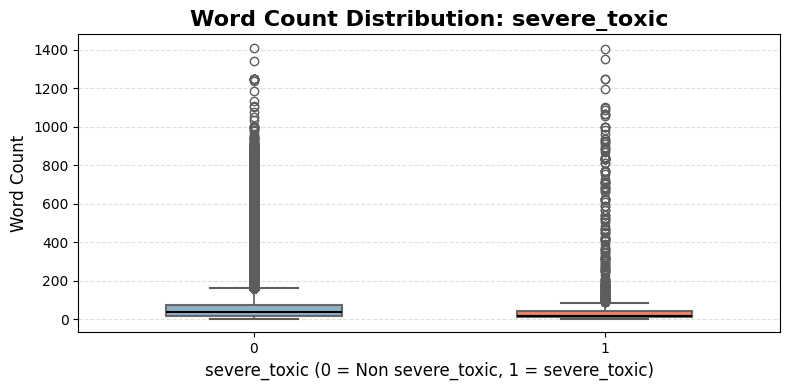

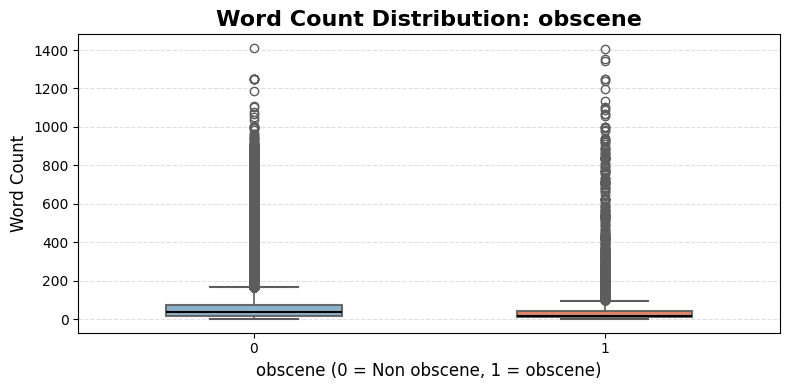

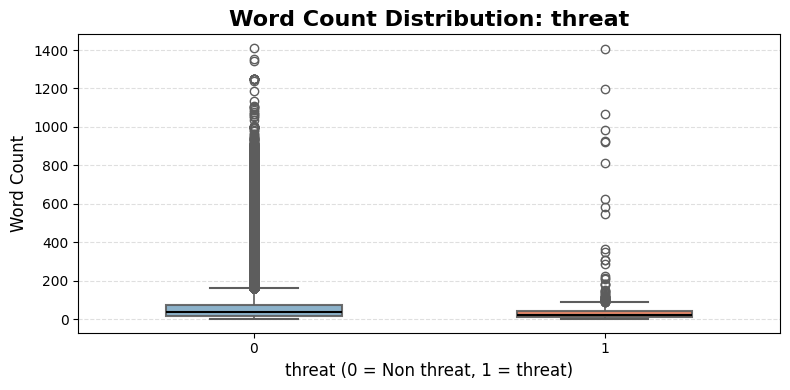

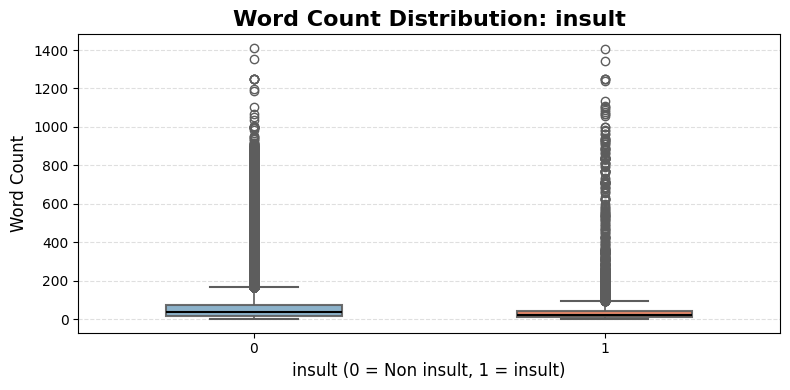

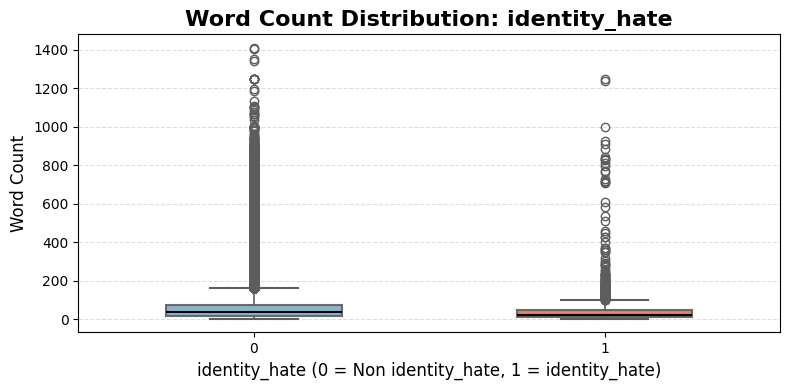

In [114]:
for label in target_cols:

    plt.figure(figsize=(8, 4))

    # More beautiful boxplot
    sns.boxplot(
        x=df[label],
        y=df["number_of_words"],
        palette=["#74add1", "#f46d43"],   # custom colors
        width=0.5,
        linewidth=1.5,
        boxprops=dict(alpha=0.9),        # transparency
        whiskerprops=dict(linewidth=1.2),
        medianprops=dict(color="black", linewidth=1.5)
    )

    plt.title(f"Word Count Distribution: {label}", fontsize=16, weight="bold")
    plt.xlabel(f"{label} (0 = Non {label}, 1 = {label})", fontsize=12)
    plt.ylabel("Word Count", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    plt.tight_layout()
    plt.show()
